## Import the required libraries and modules

In [1]:
import nltk
from nltk.corpus import names
from nltk.classify import apply_features
import random

## Let us plot last letter of the first name of all the names corpus

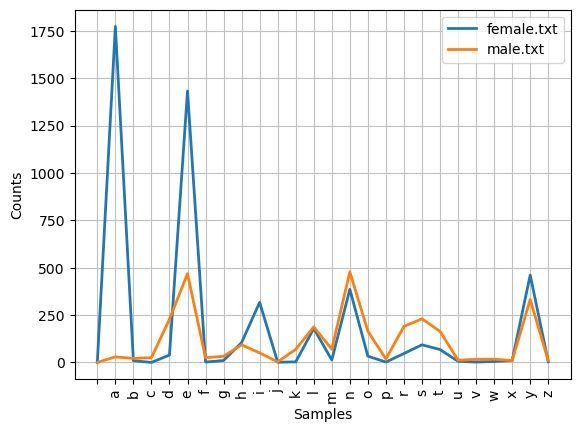

<Axes: xlabel='Samples', ylabel='Counts'>

In [2]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

It can be seen that the names that end with letters a, e, i are most probably female names. And the names that end with k, o, r, s, t are likely to be male names. We are going to use this feature as our initial input for our name classifier

## Getting all the names from corpus to a variable called names

In [15]:
all_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.seed(800)
random.shuffle(all_names)

In [4]:
print(f"Size of names data: {len(all_names)}")

Size of names data: 7944


## Creating a function for the feature extraction from a first name

In [5]:
def feature_extractor(name): 
    return({"lach":name[-1:], "lach2": name[-2:], "slach": name[-2], 'lsch3': name[-3:],'f2ch':name.lower()[:2]})    

## Splitting the data into training_set, dev_test and test_set and apply the function feature_extractor()

In [16]:
dev_set = apply_features(feature_extractor, all_names[:500])
test_set = apply_features(feature_extractor, all_names[500:1000])
training_set = apply_features(feature_extractor, all_names[1000:])

In [7]:
print(f"Size of training_set: {len(training_set)}")
print(f"Size of test_set: {len(test_set)}")
print(f"Size of dev_set: {len(dev_set)}")

Size of training_set: 6944
Size of test_set: 500
Size of dev_set: 500


## Training Naive Bayes Classfier on training_set

In [44]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [55]:
classifier.classify(feature_extractor("Stephnie"))

'female'

In [56]:
print(nltk.classify.accuracy(classifier, dev_set))

0.826


#### It gives accuracy of 81% on the dev_set which is not bad for this model 

In [67]:
acc = nltk.classify.accuracy(classifier, test_set)
print(f"Accuracy on test set: {round(acc*100, 2)}%")

Accuracy on test set: 83.4%


#### And it can be seen that the accuracy on the test_set is 83.40% which might be considered good for the prediction. This model is better than the model with only last charater based trained model. 

## Best features in this model that worked well are:

In [68]:
classifier.show_most_informative_features()

Most Informative Features
                   lach2 = 'na'           female : male   =     93.1 : 1.0
                   lach2 = 'la'           female : male   =     68.8 : 1.0
                   lach2 = 'ia'           female : male   =     51.9 : 1.0
                    lach = 'k'              male : female =     43.0 : 1.0
                   lach2 = 'ra'           female : male   =     35.5 : 1.0
                    lach = 'a'            female : male   =     33.2 : 1.0
                   lach2 = 'sa'           female : male   =     31.9 : 1.0
                   lach2 = 'io'             male : female =     26.0 : 1.0
                   lach2 = 'us'             male : female =     25.9 : 1.0
                   lach2 = 'ta'           female : male   =     23.6 : 1.0


It can be seen that the best features that worked well are last 2 character ending with 'na'. Classifier found female names with this pattern 93.1 times male names, such as Helena, Caterina, Angelina etc. The names that end with 'k' are mostly male names 43.0 times females. 

### Possible improvement in the model:

In [78]:
errors = []
for (name, lab) in all_names[500:1000] :
    #print(name, lab)
    pred = classifier.classify(feature_extractor(name))
    if pred != lab:
        errors.append((lab, pred, name))
errors[:10]

[('male', 'female', 'Bjorne'),
 ('female', 'male', 'Joycelin'),
 ('female', 'male', 'Umeko'),
 ('female', 'male', 'Iris'),
 ('female', 'male', 'Wendie'),
 ('male', 'female', 'Judy'),
 ('male', 'female', 'Wittie'),
 ('male', 'female', 'Corrie'),
 ('male', 'female', 'Jeth'),
 ('female', 'male', 'Brier')]

To make the model more efficient, the ambiguous names can be removed from the training set so that the traning of the model could be better. 

In [105]:
m_names = [name for name in names.words('male.txt')]
f_names = [name for name in names.words('female.txt')]
common_names = [name for name in m_names if name in f_names]
print(f"size of common_names in the names corpus: {len(common_names)}")
print("Twenty common names are: ")
print(common_names[:20])

size of common_names in the names corpus: 365
Twenty common names are: 
['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel']


## Removing the common names from name corpus 

In [106]:
for name, label in all_names:
    if name in common_names:
        all_names.remove((name, label))
len(common_names)

365

In [107]:
all_names[:5]

[('Ezechiel', 'male'),
 ('Kare', 'female'),
 ('Zea', 'female'),
 ('Brynna', 'female'),
 ('Tabina', 'female')]

In [123]:
def feature_extractor(name): 
    return({"lach":name[-1:], "lach2": name[-2:], "slach": name[-2], 'lsch3': name[-3:],'f2ch':name.lower()[:2], 'f4ch':name.lower()[-4:]})  

In [125]:
dev_set = apply_features(feature_extractor, all_names[:500])
test_set = apply_features(feature_extractor, all_names[500:1000])
training_set = apply_features(feature_extractor, all_names[1000:])

classifier = nltk.NaiveBayesClassifier.train(training_set)
print(f"Accuracy on dev_test: {100*nltk.classify.accuracy(classifier, dev_set)}%")
acc = nltk.classify.accuracy(classifier, test_set)
print(f"Accuracy on test set: {round(acc*100, 2)}%")

Accuracy on dev_test: 87.8%
Accuracy on test set: 86.6%


### Better the training dataset better is the model. Thus, we see improved accuracy 87.8% on dev_set while 86.6%% on test_set. This model is better than the model trained on the data without removing the common names. This model can further be imrpoved by checking the pattern in the prediction errors

In [109]:
classifier.show_most_informative_features()

Most Informative Features
                   lach2 = 'na'           female : male   =    144.4 : 1.0
                   lach2 = 'la'           female : male   =     65.2 : 1.0
                   lach2 = 'ra'           female : male   =     54.1 : 1.0
                   lach2 = 'ia'           female : male   =     48.5 : 1.0
                    lach = 'a'            female : male   =     48.5 : 1.0
                   lach2 = 'ta'           female : male   =     40.0 : 1.0
                   lach2 = 'us'             male : female =     36.6 : 1.0
                   lach2 = 'rt'             male : female =     29.6 : 1.0
                   lach2 = 'io'             male : female =     27.3 : 1.0
                   lsch3 = 'ita'          female : male   =     24.8 : 1.0


## Let's find errors in the test_set predictions

In [114]:
errors = []
for (name, lab) in all_names[500:1000] :  # test set was taken by setting index 500:1000 from randomised all_names
    #print(name, lab)
    pred = classifier.classify(feature_extractor(name))
    if pred != lab:
        errors.append((lab, pred, name))
errors

[('female', 'male', 'Brier'),
 ('female', 'male', 'Rahel'),
 ('male', 'female', 'Lemmy'),
 ('female', 'male', 'Avril'),
 ('female', 'male', 'Rozalin'),
 ('male', 'female', 'Kalil'),
 ('female', 'male', 'Gennifer'),
 ('female', 'male', 'Maren'),
 ('female', 'male', 'Rayshell'),
 ('female', 'male', 'Rachel'),
 ('female', 'male', 'Rosario'),
 ('male', 'female', 'Lenny'),
 ('female', 'male', 'Avis'),
 ('male', 'female', 'Petey'),
 ('female', 'male', 'Marit'),
 ('female', 'male', 'Meridel'),
 ('female', 'male', 'Storey'),
 ('female', 'male', 'Aleece'),
 ('male', 'female', 'Morty'),
 ('female', 'male', 'Cameo'),
 ('male', 'female', 'Odin'),
 ('female', 'male', 'Garnet'),
 ('female', 'male', 'Bidget'),
 ('male', 'female', 'Rudy'),
 ('female', 'male', 'Robinet'),
 ('female', 'male', 'Terri-Jo'),
 ('female', 'male', 'France'),
 ('female', 'male', 'Opal'),
 ('female', 'male', 'Haily'),
 ('female', 'male', 'Felicdad'),
 ('female', 'male', 'Blanch'),
 ('female', 'male', 'Mavis'),
 ('female', 'male

I don't see any further patterns in the errors of test set that could be utilised to improve the name classifier model. 